<a href="https://colab.research.google.com/github/Nacho2904/orga_de_datos/blob/main/tp3_visus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizaciones y análisis exploratorio del tp3

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive 

drive.mount('/content/gdrive')
path_a_training_set = 'gdrive/MyDrive/TP3 dataset music/train.parquet'

#4.95 16:16
#4.96 16:28

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
df_music = pd.read_parquet(path_a_training_set)

In [15]:
df_music.head()

,track_name,lyric,genre,language,popularity,artist,a_genres,a_songs,a_popularity,did,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Halo,Remember those walls I built\nWell baby they'r...,Dance,en,79,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
1,Halo,Remember those walls I built\nWell baby they'r...,Pop,en,80,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
2,Halo,Remember those walls I built\nWell baby they'r...,R&B,en,80,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
3,Partition,Driver roll up the partition please\nDriver ro...,Dance,en,71,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174
4,Partition,Driver roll up the partition please\nDriver ro...,Pop,en,71,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174


In [16]:
df_music.describe()

,popularity,a_songs,a_popularity,did,s-label,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,31383.000000,31383.000000,31383.000000,7004.000000,7004.000000,31383.000000,31383.000000,3.138300e+04,31383.000000,31383.000000,31383.000000,31383.000000,31383.000000,31383.000000,31383.000000
mean,53.394131,157.816716,8.535481,77926.453598,0.490309,0.204786,0.562056,2.356413e+05,0.680652,0.054620,0.191566,-7.049882,0.082286,121.824346,0.498826
std,12.608777,107.946587,21.634140,46585.206681,0.236605,0.268975,0.154644,6.795071e+04,0.216309,0.169244,0.150965,3.368481,0.087809,30.278152,0.235068
min,0.000000,1.000000,0.000000,167.000000,0.032100,0.000001,0.061700,3.141300e+04,0.007560,0.000000,0.009670,-33.350000,0.022200,34.717000,0.027200
25%,46.000000,87.000000,0.000000,38101.750000,0.301000,0.007815,0.457000,1.973730e+05,0.539000,0.000000,0.096000,-8.631500,0.034200,97.025000,0.313000
50%,54.000000,127.000000,1.500000,77514.000000,0.476000,0.070300,0.561000,2.269380e+05,0.716000,0.000019,0.130000,-6.220000,0.047500,119.974000,0.492000
75%,62.000000,199.000000,5.500000,120687.250000,0.674000,0.314000,0.671000,2.634735e+05,0.858000,0.003160,0.249000,-4.679000,0.086300,141.869000,0.681000
max,100.000000,759.000000,205.500000,158320.000000,0.984000,0.995000,0.986000,1.618693e+06,0.998000,0.994000,0.991000,0.605000,0.959000,220.041000,0.986000


Empezamos a plantear los plots. Lo primero que podríamos pensar es que hay géneros más populares que otros, y que esta feature podría ser bastante importante (en general, guiaremos el análisis con este objetivo, encontrar/descubrir features interesantes). Esto se debe a que géneros como el Pop o el Rock deberían ser más populares que otros géneros debido al carácter comercial de la música que producen los artistas de dicho género y a su inmensa variedad, por lo tanto, la popularidad podría ser muy útil para nuestro modelo. Para confirmar dicha suposición emplearemos un boxplot.

In [17]:
df_music_grouped_by_genre = df_music.groupby("genre").agg(np.median)
genres_ordered_by_median_popularity = list(df_music_grouped_by_genre.reset_index().sort_values("popularity").genre)

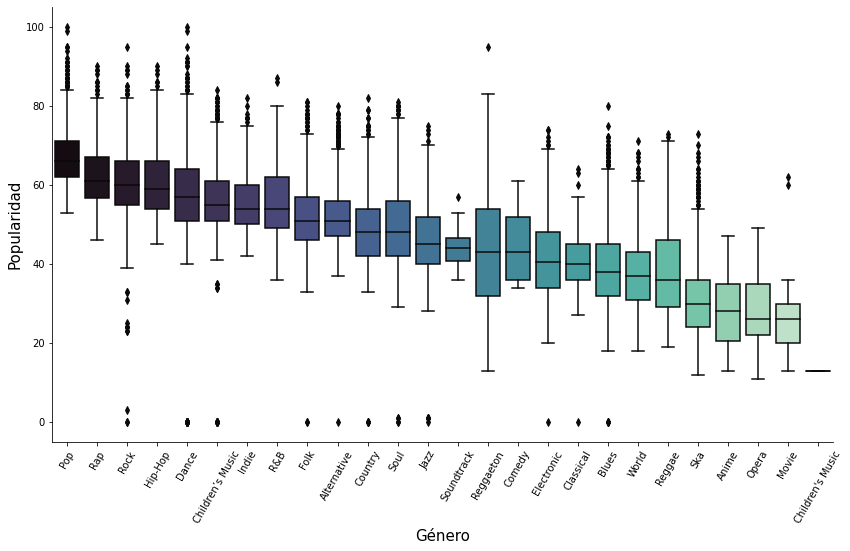

In [18]:
plt.figure(figsize=(14,8))
sns.boxplot(x = df_music.genre, y = df_music.popularity, order = genres_ordered_by_median_popularity[::-1],
            palette = "mako")
sns.despine()
plt.ylabel("Popularidad", fontsize = 15)
plt.xlabel("Género", fontsize = 15)
plt.xticks(rotation = 60, fontsize = 10);

Notamos que hay un label particularmente patológico: el de música para niños (Children's Music). Analizamos esto más a fondo.

In [19]:
df_music_recuento_filas_por_genero = df_music.groupby("genre").count().reset_index()[["genre", "track_name"]].rename(
    columns = {"track_name": "Recuento de filas"}).sort_values("Recuento de filas")
df_music_recuento_filas_por_genero


,genre,Recuento de filas
3,Children's Music,1
15,Opera,9
24,Soundtrack,16
14,Movie,29
6,Comedy,37
1,Anime,47
5,Classical,147
20,Reggaeton,358
25,World,487
13,Jazz,612


Notamos que hay varios labels para los cuales casi no tenemos nada de información. Específicamente:

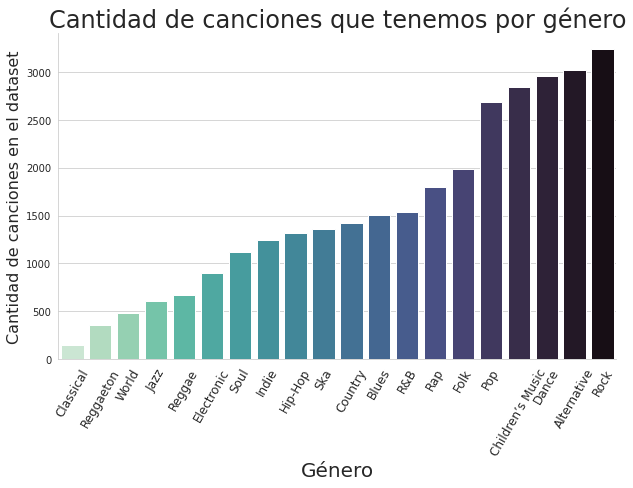

In [94]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(data = df_music_recuento_filas_por_genero[df_music_recuento_filas_por_genero["Recuento de filas"] > 50],
            x="genre", y="Recuento de filas", palette = "mako_r")
plt.title("Cantidad de canciones que tenemos por género", fontsize = 24)
plt.xlabel("Género", fontsize = 20)
plt.ylabel("Cantidad de canciones en el dataset", fontsize = 16)
plt.xticks(rotation = 60, fontsize = 12)
sns.despine();

In [73]:
df_music_recuento_filas_por_genero[df_music_recuento_filas_por_genero["Recuento de filas"] > 50]

,genre,Recuento de filas
5,Classical,147
20,Reggaeton,358
25,World,487
13,Jazz,612
19,Reggae,675
9,Electronic,896
23,Soul,1124
12,Indie,1241
11,Hip-Hop,1318
22,Ska,1360


Vemos que tenemos muy pocas observaciones de Opera, Soundtrack, Movie, Comedy y Anime. No solo eso, si no que algunos de estos "géneros" como Movie o Anime son naturalmente malos puesto que son música de otros géneros cuya única diferencia es pertecener a una película, pero son fundamentalmente indistinguibles de música normal. Por otro lado, no pasa esto último con los soundtrack y las óperas, pero seguramente generarán problemas para nuestros futuros modelos por tener demasiada poca información. Eliminamos todos estos géneros problemáticos del dataset, y arreglamos lo de la música para niños

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


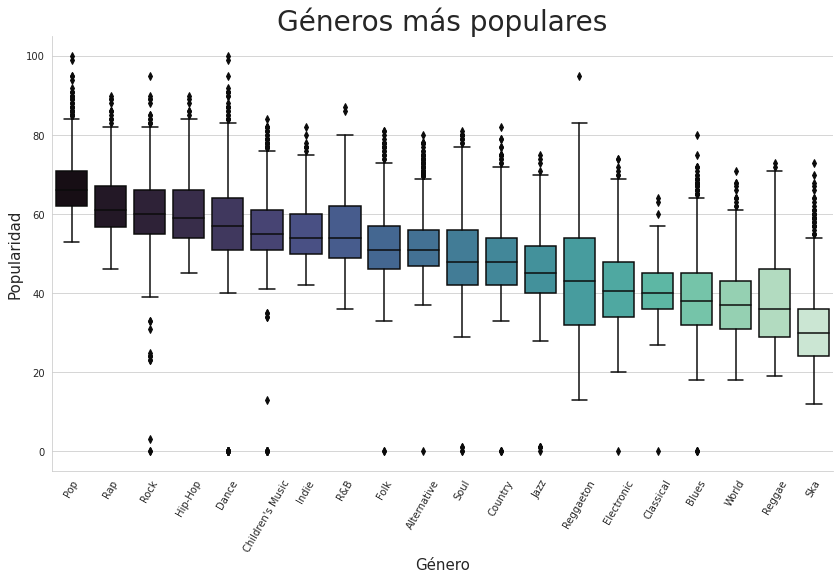

In [87]:
generos_problematicos = list(df_music_recuento_filas_por_genero[df_music_recuento_filas_por_genero["Recuento de filas"] < 50].genre)[1:]
df_music_filtered = df_music[~df_music["genre"].isin(generos_problematicos)]
df_music_filtered.loc[df_music_filtered["genre"].str.contains("Children"), "genre"] = "Children's Music"
df_music_grouped_by_genre = df_music_filtered.groupby("genre").agg(np.median)
genres_ordered_by_median_popularity = list(df_music_grouped_by_genre.reset_index().sort_values("popularity").genre)

plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
sns.boxplot(x = df_music_filtered.genre, y = df_music_filtered.popularity, order = genres_ordered_by_median_popularity[::-1],
            palette = "mako")
sns.despine()
plt.ylabel("Popularidad", fontsize = 15)
plt.xlabel("Género", fontsize = 15)
plt.xticks(rotation = 60, fontsize = 10)
plt.title("Géneros más populares", fontsize = 28);

Notamos que nuestras sospechas eran correctas pues si por ejemplo tuviésemos que clasificar si una canción es de pop, jazz o ska podríamos hacerlo casi solo con mirar la popularidad, por lo que efectivamente es una métrica interesante.

Lo siguente que podría interesarnos es cómo se mezclan los géneros. Esto nos podría interesar para poder analizar luego por qué se confunde nuestro clasificador. Calcularemos la probabilidad de que una canción de un determinado género, tenga también otro género, para todos los géneros

In [22]:
#Este df contiene los géneros que tiene cada canción
df_music_filtered_grouped_by_song = df_music_filtered.groupby("track_name")["genre"].agg(lambda x : ','.join(x)).to_frame().reset_index()
df_music_filtered_grouped_by_song["genre"] = df_music_filtered_grouped_by_song["genre"].map(lambda genres: tuple(genres.split(",")))
df_music_filtered_grouped_by_song["track_name"] = df_music_filtered_grouped_by_song["track_name"].astype(str)

In [23]:
list_of_genres = sorted(list(df_music_filtered.genre.unique()))

def create_genres_vectors_from_genres(song_genres: tuple) -> np.array:
  song_genres_vectors = [0 if genre not in song_genres else 1 for genre in list_of_genres]
  return np.array(song_genres_vectors)
  
df_music_filtered_grouped_by_song = df_music_filtered_grouped_by_song.rename(columns={"genre":"genres"})
df_music_filtered_grouped_by_song["genres"] = df_music_filtered_grouped_by_song["genres"].map(create_genres_vectors_from_genres)
df_music_filtered_grouped_by_song.iloc[0].genres

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [24]:
df_music_filtered_useful_columns = df_music_filtered[["track_name", "genre"]]
df_music_filtered_useful_columns.loc["track_name"] = df_music_filtered_useful_columns["track_name"].astype(str)
df_music_songs_with_all_genres = df_music_filtered_useful_columns.merge(df_music_filtered_grouped_by_song, on = "track_name")

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [25]:
df_music_probability_vectors_by_genre = df_music_songs_with_all_genres.groupby("genre").agg(counts_by_genre_vector = ("genres", "sum"), 
                                                                                            count_by_genre = ("genres", "count")).reset_index()
df_music_probability_vectors_by_genre["probs_by_genre"] = df_music_probability_vectors_by_genre["counts_by_genre_vector"]/ \
                                                          df_music_probability_vectors_by_genre["count_by_genre"]

probs_as_matrix = pd.DataFrame(np.array(list(df_music_probability_vectors_by_genre["probs_by_genre"])), columns = sorted(list_of_genres),
                               index = sorted(list_of_genres))

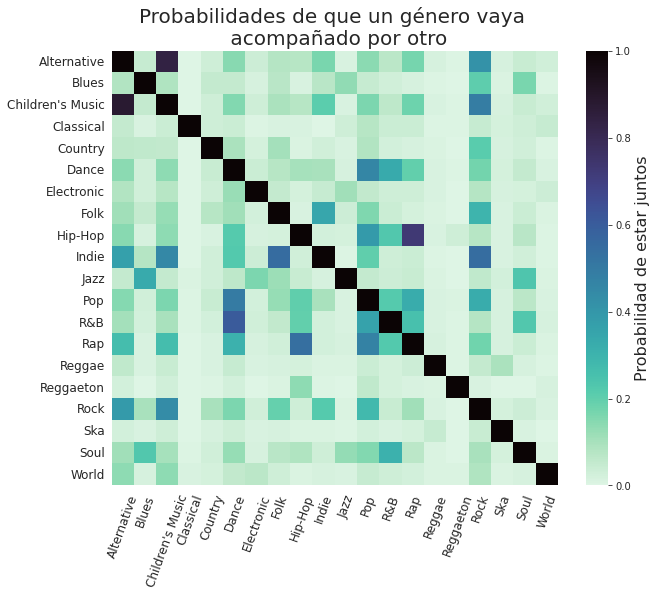

In [88]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
plt.title("Probabilidades de que un género vaya \n acompañado por otro", fontsize = 20)
ax = sns.heatmap(probs_as_matrix, cmap = sns.color_palette("mako_r", as_cmap=True),
            cbar_kws={"label": 'Probabilidad de estar juntos', "pad": 0.05})
plt.xticks(fontsize = 12, rotation = 70)
plt.yticks(fontsize = 12)
ax.figure.axes[-1].yaxis.label.set_size(16)
plt.show();

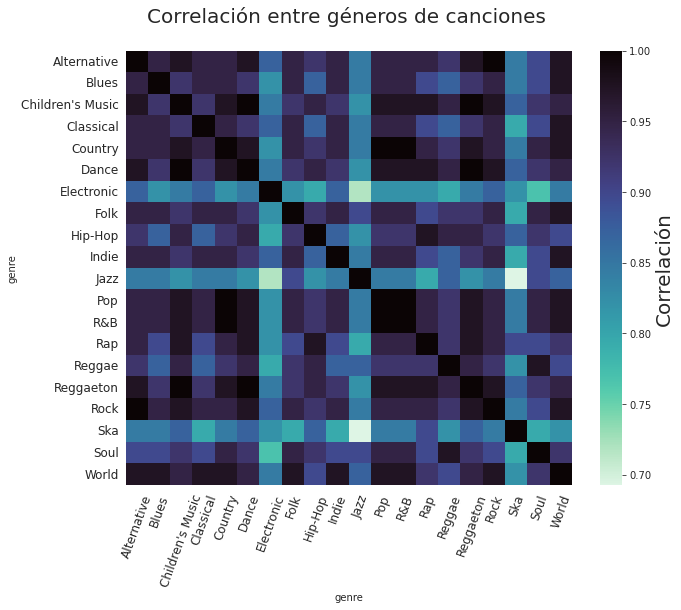

In [271]:
df_music_filtered_grouped_by_genre = df_music_filtered.groupby("genre").mean()

plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
plt.title("Correlación entre géneros de canciones \n", fontsize = 20)
ax = sns.heatmap(df_music_filtered_grouped_by_genre.T.corr(method = "kendall"), cmap = sns.color_palette("mako_r", as_cmap=True),
            cbar_kws={"label": 'Correlación', "pad": 0.05})
plt.xticks(fontsize = 12, rotation = 70)
plt.yticks(fontsize = 12)
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.show();

In [95]:
df_music_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31245 entries, 0 to 34336
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        31245 non-null  object 
 1   lyric             31242 non-null  object 
 2   genre             31245 non-null  object 
 3   language          23968 non-null  object 
 4   popularity        31245 non-null  int64  
 5   artist            31245 non-null  object 
 6   a_genres          31245 non-null  object 
 7   a_songs           31245 non-null  float64
 8   a_popularity      31245 non-null  float64
 9   did               6966 non-null   float64
 10  s-label           6966 non-null   float64
 11  acousticness      31245 non-null  float64
 12  danceability      31245 non-null  float64
 13  duration_ms       31245 non-null  int64  
 14  energy            31245 non-null  float64
 15  instrumentalness  31245 non-null  float64
 16  key               31245 non-null  object

Otro feature que podría ser interesante, al igual que la popularidad, es el **loudness**, puesto claramente permite diferenciar varios géneros como puede ser Rock y Reggae.

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


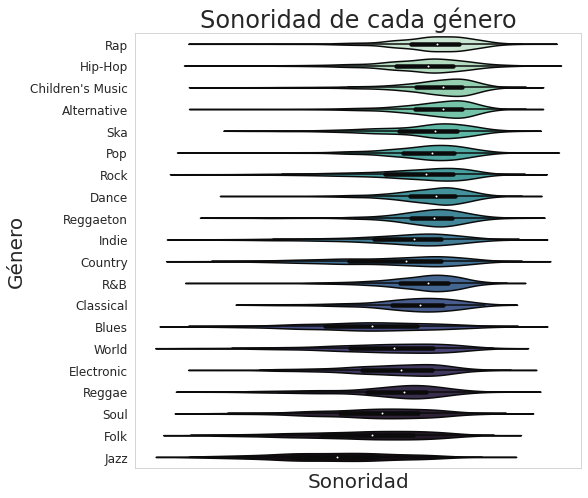

In [122]:
def third_percentile_agg(series):
  return np.percentile(series, 95)

df_music_grouped_by_genre = df_music_filtered.groupby("genre").agg(third_percentile_agg)
genres_ordered_by_median_loudness = list(df_music_grouped_by_genre.reset_index().sort_values("loudness").genre)

plt.figure(figsize=(8,8))
sns.violinplot(data = df_music_filtered[df_music_filtered["loudness"] > -20],
               y = "genre", x= "loudness", order = genres_ordered_by_median_loudness[::-1],
               palette = "mako_r")
plt.title("Sonoridad de cada género", fontsize = 24)
plt.ylabel("Género", fontsize = 20)
plt.xlabel("Sonoridad", fontsize = 20)
plt.xticks([])
plt.yticks(fontsize=12);

In [126]:
df_music_filtered[~df_music_filtered["did"].notnull()]

,track_name,lyric,genre,language,popularity,artist,a_genres,a_songs,a_popularity,did,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Halo,Remember those walls I built\nWell baby they'r...,Dance,en,79,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
1,Halo,Remember those walls I built\nWell baby they'r...,Pop,en,80,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
2,Halo,Remember those walls I built\nWell baby they'r...,R&B,en,80,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
3,Partition,Driver roll up the partition please\nDriver ro...,Dance,en,71,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174
4,Partition,Driver roll up the partition please\nDriver ro...,Pop,en,71,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26876,Zombie,"Zombie o, zombie (Zombie o, zombie)\nZombie o,...",World,en,40,Fela Kuti,World Music,9.0,0.0,NaN,...,0.942,0.0147,D,0.3020,-5.115,Minor,0.1710,131.690,4/4,0.584
26877,Zombie,"Zombie o, zombie (Zombie o, zombie)\nZombie o,...",Soul,en,40,Fela Kuti,World Music,9.0,0.0,NaN,...,0.942,0.0147,D,0.3020,-5.115,Minor,0.1710,131.690,4/4,0.584
26878,Libertango,Mi libertad me ama y todo el ser le entrego.\n...,Classical,es,40,Astor Piazzolla,World Music,16.0,1.6,NaN,...,0.474,0.9400,A,0.1240,-11.240,Minor,0.0282,139.890,4/4,0.805
26879,Pata Pata,Sat cuguga sat ju benga sat si pata pata\nSat ...,Jazz,en,55,Miriam Makeba,World Music; Black Music; Blues,17.0,0.0,NaN,...,0.882,0.0000,D#,0.0759,-3.544,Major,0.0356,126.046,4/4,0.969


Ya que estamos, vemos arriba que hay una enorme cantidad de filas sin valor de las columnas *did* y *slabel*. Eliminamos dicha columna pues no nos da mucha información.

In [133]:
df_music_filtered.drop(["did", "s-label"], inplace = True, axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Una columna interesante es *key* por ser categórica. Analizamos su utilidad mediante un plot correspondiente.

In [199]:
df_music_relevant_columns = df_music_filtered[["genre", "key"]]
keys = sorted(list(df_music_relevant_columns["key"].unique()))
dfs_by_genre = [df_music_relevant_columns[df_music_filtered["key"].isin(keys[:i])] for i in range(1,len(keys)+1)]
dfs_by_genre_grouped = [df.groupby("genre").count().reset_index() for df in dfs_by_genre]

In [230]:
generos_por_cantidad_de_canciones = list(df_music_recuento_filas_por_genero["genre"])[1:][::-1][:-5]
generos_por_cantidad_de_canciones[3] = "Children's Music"

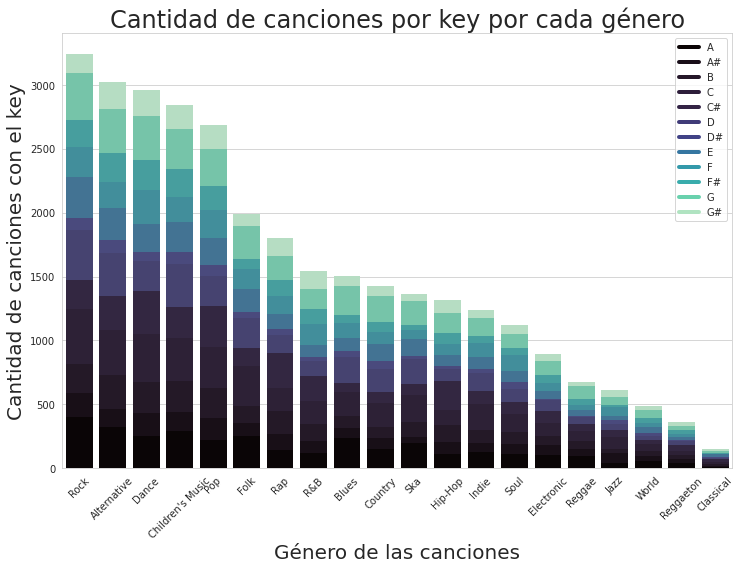

In [231]:
from matplotlib.lines import Line2D
colors = ["#0B0405", "#190E18", "#251729", "#2D1D3A", "#332345", "#403B78", "#414286", "#3576A1", "#3399AA", "#39ACAC", "#69D1AD", "#B0E3C1"]
plt.figure(figsize = (12, 8))
custom_lines = [Line2D([0], [0], color = colors[i], lw=4) for i in range(0,len(colors))]
for i in range(len(colors)-1, -1, -1):
  sns.barplot(x="genre",  y="key", color=colors[i], data=dfs_by_genre_grouped[i], edgecolor = "none", dodge = False,
              order = generos_por_cantidad_de_canciones)
plt.title("Cantidad de canciones por key por cada género", fontsize = 24)
plt.ylabel("Cantidad de canciones con el key", fontsize=20)
plt.xlabel("Género de las canciones", fontsize = 20)
plt.legend(custom_lines, keys)
plt.xticks(rotation = 45);
